In [1]:
import json
from pathlib import Path
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from io_f import read_data_file
from main import calibrate_magnetic_wifi_ibeacon_to_position, extract_magnetic_strength

## Prepare environment and read data
Adopted from the sample code

In [2]:
selected_floor = 'B1'
floor_data_dir = f'./data/site1/{selected_floor}'
path_data_dir = floor_data_dir + '/path_data_files'
floor_plan_filename = floor_data_dir + '/floor_image.png'
floor_info_filename = floor_data_dir + '/floor_info.json'

save_dir = f'./output/site1/{selected_floor}'
path_image_save_dir = save_dir + '/path_images'
step_position_image_save_dir = save_dir
magn_image_save_dir = save_dir
wifi_image_save_dir = save_dir + '/wifi_images'
ibeacon_image_save_dir = save_dir + '/ibeacon_images'
wifi_count_image_save_dir = save_dir
Path(path_image_save_dir).mkdir(parents=True, exist_ok=True)
Path(magn_image_save_dir).mkdir(parents=True, exist_ok=True)
Path(wifi_image_save_dir).mkdir(parents=True, exist_ok=True)
Path(ibeacon_image_save_dir).mkdir(parents=True, exist_ok=True)

In [3]:
with open(floor_info_filename) as f:
    floor_info = json.load(f)
width_meter = floor_info["map_info"]["width"]
height_meter = floor_info["map_info"]["height"]

path_filenames = list(Path(path_data_dir).resolve().glob("*.txt"))

### Visualization of Waypoints

Han Yaodong

In [4]:
def visualize_path(path_id, waypoints, width_meter, height_meter):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.add_line(plt.Line2D(waypoints[:, 0], waypoints[:, 1], marker='.', color='grey'))
    for i, xy in enumerate(waypoints):
        ax.annotate(i + 1, xy)
    ax.set_title(f'Waypoints for {path_id} at Floor {selected_floor}')
    ax.set_xlim([0, width_meter])
    ax.set_ylim([0, height_meter])
    return fig

In [5]:
# reading data and visualize paths
waypoints_list = []
for path_filename in path_filenames:
    print(f'Processing file: {path_filename}...')

    path_data = read_data_file(path_filename)
    path_id = path_filename.name.split(".")[0]
    waypoints = path_data.waypoint[:, 1:3]
    waypoints_list.append(waypoints)
    
    # paths
    fig = visualize_path(path_id, waypoints, width_meter, height_meter)
    fig.savefig(f'{path_image_save_dir}/{path_id}.png')
    plt.close(fig)

Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14979191710006b5720e.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda1499c5b77e0006b1752f.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda149dc5b77e0006b17531.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda149f9191710006b57212.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a2c5b77e0006b17533.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a39191710006b57214.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a5c5b77e0006b17535.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project

Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda333e9191710006b5732c.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda333f9191710006b5732e.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda333fc5b77e0006b17644.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33409191710006b57330.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33409191710006b57332.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33429191710006b57334.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33429191710006b57336.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project

Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb93049191710006b57637.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb93079191710006b5763b.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb93099191710006b5763d.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb9309c5b77e0006b179a6.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb930a9191710006b5763f.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb930b9191710006b57641.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb930c9191710006b57643.txt...
Processing file: C:\Users\yupen\Desktop\AI6128\project1\codes\project

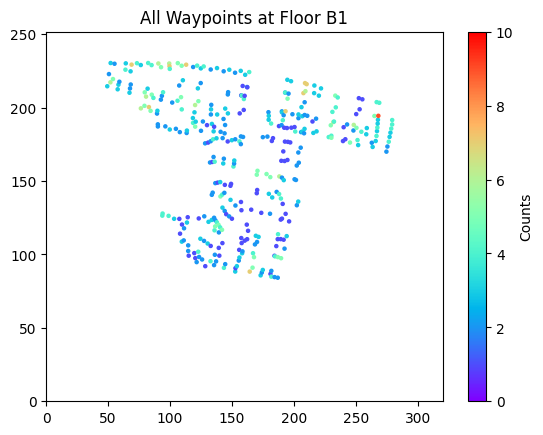

In [6]:
# visualize waypoints
all_waypoints = np.concatenate(waypoints_list)
unique_waypoints, counts = np.unique(all_waypoints, axis=0, return_counts=True)

fig = plt.figure()
ax = fig.add_subplot()
sc = plt.scatter(unique_waypoints[:, 0], unique_waypoints[:, 1], s=20, c=counts, marker='.', cmap='rainbow', vmin=0, vmax=10)
cbar = plt.colorbar(sc)
cbar.set_label("Counts")
ax.set_title(f'All Waypoints at Floor {selected_floor}')
ax.set_xlim([0, width_meter])
ax.set_ylim([0, height_meter + 20])
fig.savefig(f'{save_dir}/waypoints.png')

### Visualization of Geomagnetic Strength
Ben

In [7]:
#The following function is developed to plot the different sets of GeoMagnetic Strength X,Y,Z at same position, in order to identify the outliners
def plot_sensor_info(df, name):
    cols = ["x", "y", "z"]
    plt.subplots(1, 1, sharex='col', sharey='row', figsize=(8,5))
    plt.suptitle(name, fontsize=22)
    plt.plot(df['time'], df['z'], color='#000000', label='z_axis')
    plt.plot(df['time'], df['y'], color='#d6b258', label='y_axis')
    plt.plot(df['time'], df['x'], color='#96bcfa', label='x_axis')
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.show()

   
def revised_extract_magnetic_strength(mwi_datas):
    magnetic_strength = {}
    for position_key in mwi_datas:
        magnetic_data = mwi_datas[position_key]['magnetic']
        df = pd.DataFrame(magnetic_data, columns=['time', 'x', 'y', 'z'])
        magnetic_s = np.mean(np.sqrt(np.sum(magnetic_data[:, 1:4] ** 2, axis=1)))
        #
        #Below codes are to calculate if the X,Y,Z deviate too much across different measurement at same step positions, 
        #in order to identify noise
        #calculate mean and variance
        x_mean = np.mean(magnetic_data[:, 1])
        y_mean = np.mean(magnetic_data[:, 2])
        z_mean = np.mean(magnetic_data[:, 3])
        variance_magn_data=magnetic_data
        variance_magn_data[:, 1] -= x_mean
        variance_magn_data[:, 2] -= y_mean
        variance_magn_data[:, 3] -= z_mean
        variance_mean= np.mean(np.sqrt(np.sum(variance_magn_data[:, 1:4] ** 2, axis=1)))
        print("this is the position of below magnetic data measurement",position_key)
        print("variance is:",variance_mean)
        #
        #Set a threshold 4 such that if average variance of X,Y,Z greater than 4, 
        #such measurement is removed from the dataset, in order to create a clean and quality dataset for future training
        threshold=4
        if variance_mean < threshold:
           magnetic_strength[position_key] = magnetic_s
        #Enable line if need to capture the plot of outliner as it take long time to process 1000+ ploting.
        #if variance_mean >= threshold:
        #    #plot_sensor_info(df, "GeoMagnetic data")
        #
        #Enable below line instead of above if need to capture the plot of all X,Y,Z in different step positions
        #plot_sensor_info(df, "GeoMagnetic data")
    total_keys_before_cleanup = len(mwi_datas)
    total_keys_post_cleanup = len(magnetic_strength)
    print("total positions before cleanup are:",total_keys_before_cleanup, "total positions after removing variance>=4:",total_keys_post_cleanup)
    return magnetic_strength


In [8]:
mwi_datas = calibrate_magnetic_wifi_ibeacon_to_position(path_filenames)

Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14979191710006b5720e.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda1499c5b77e0006b1752f.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda149dc5b77e0006b17531.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda149f9191710006b57212.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a2c5b77e0006b17533.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a39191710006b57214.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a5c5b77e0006b17535.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda14a791917100

Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33409191710006b57330.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33409191710006b57332.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33429191710006b57334.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33429191710006b57336.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda3342c5b77e0006b17646.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda3343c5b77e0006b17648.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda33449191710006b57338.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5dda3344c5b77e00

Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb930dc5b77e0006b179ac.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb930e9191710006b57645.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5ddb949cc5b77e0006b179ae.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5de8c24d376b9d0006fdaa23.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5de8c24d7491b00006eaafdb.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5de8c709376b9d0006fdaa35.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5de8c70b376b9d0006fdaa37.txt...
Processing C:\Users\yupen\Desktop\AI6128\project1\codes\project1\data\site1\B1\path_data_files\5de8c70b7491b000

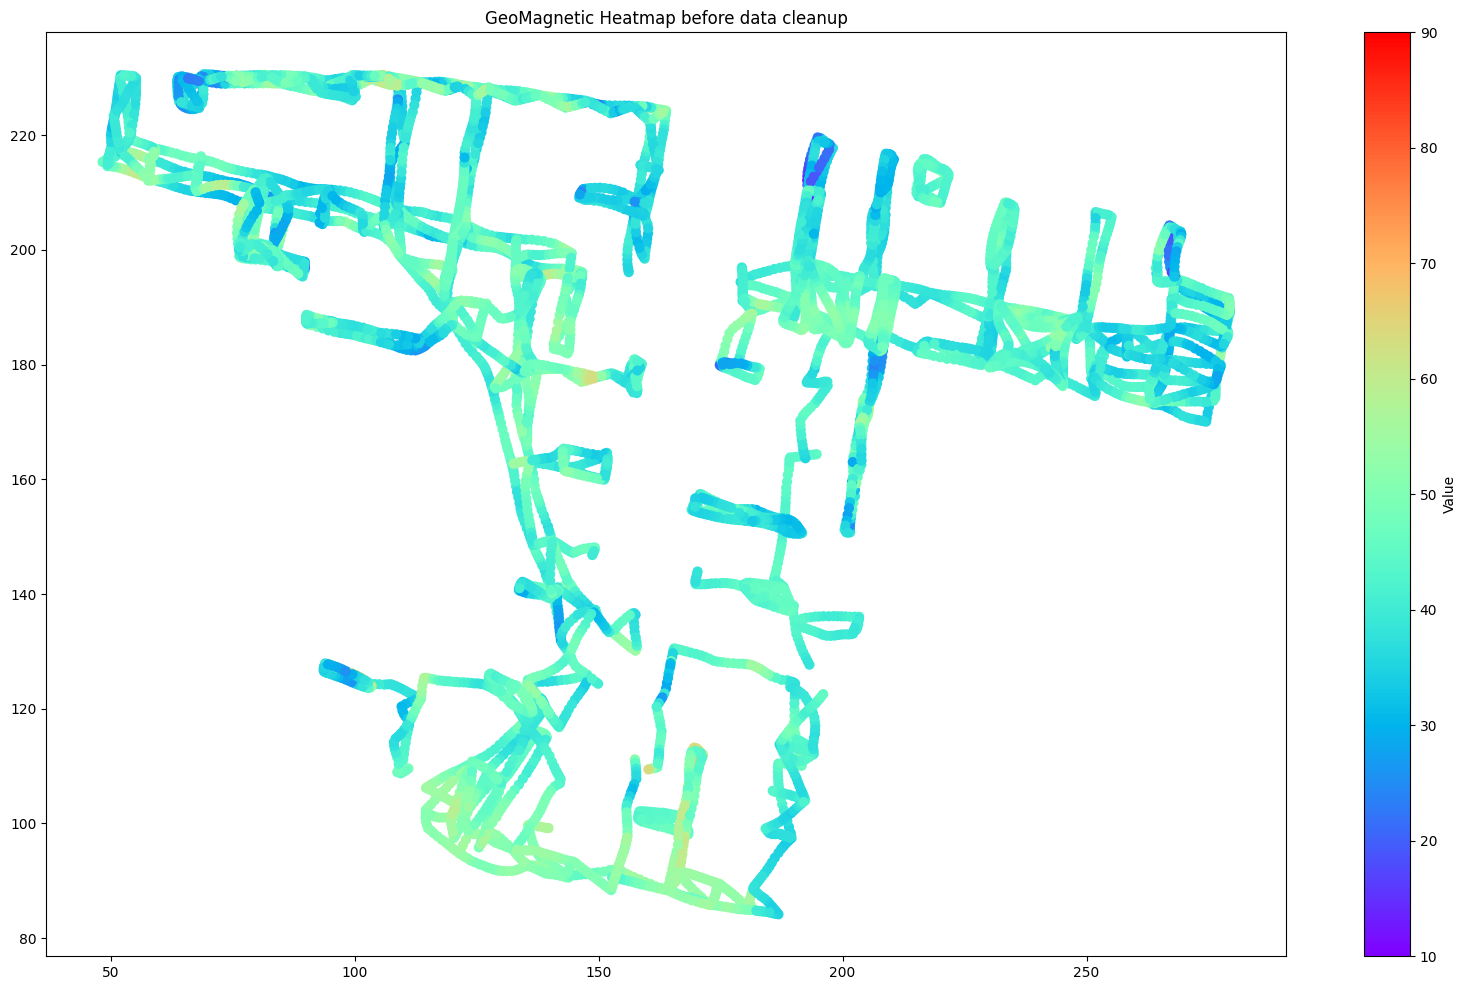

In [9]:
#visualize magnetic heatmap before data cleanup

# Define global color scale limits so all heatmaps are consistent for comparison
global_vmin = 10  # replace with your desired minimum value
global_vmax = 90   # replace with your desired maximum value
#
magnetic_strength = extract_magnetic_strength(mwi_datas)
position = np.array(list(magnetic_strength.keys()))
value = np.array(list(magnetic_strength.values()))
colorbar_title = "Value"
title = "GeoMagnetic Heatmap before data cleanup"

# Create a scatter plot
plt.figure(figsize=(20, 12))
sc = plt.scatter(position[:, 0], position[:, 1], c=value, s=40, cmap='rainbow', vmin=global_vmin, vmax=global_vmax)  

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label(colorbar_title)

# Set the title
plt.title(title)

# Show the plot
plt.show()

this is the position of below magnetic data measurement (209.69723958981075, 216.295877202169)
variance is: 1.5848153474957063
this is the position of below magnetic data measurement (210.03210715991432, 215.59844570817322)
variance is: 12.282551946548727
this is the position of below magnetic data measurement (209.43788005605913, 214.55064770929746)
variance is: 3.729406901214399
this is the position of below magnetic data measurement (208.32696913629445, 212.00342872258008)
variance is: 2.248976950260552
this is the position of below magnetic data measurement (207.48692119137223, 209.25215211596736)
variance is: 1.7347143071026598
this is the position of below magnetic data measurement (206.85886710899754, 207.5113350225912)
variance is: 2.1272551343608432
this is the position of below magnetic data measurement (205.93897030356965, 204.92744283815102)
variance is: 1.6847476490715574
this is the position of below magnetic data measurement (205.82008209386183, 202.965823808006)
varianc

this is the position of below magnetic data measurement (136.36307, 119.10931)
variance is: 30.81100858914234
this is the position of below magnetic data measurement (136.25628759600994, 117.76370052557773)
variance is: 2.1531273606753354
this is the position of below magnetic data measurement (135.41140289046078, 115.5782733732933)
variance is: 1.6520077503998962
this is the position of below magnetic data measurement (135.13374989560998, 115.15257572048819)
variance is: 1.6590595843799685
this is the position of below magnetic data measurement (134.1771735892489, 113.56128193044552)
variance is: 2.549310665394147
this is the position of below magnetic data measurement (132.38731695771816, 111.03124395816002)
variance is: 3.7380104734670936
this is the position of below magnetic data measurement (129.99098287659154, 107.08419772428502)
variance is: 5.2274041769477595
this is the position of below magnetic data measurement (129.31569047673364, 107.648122146923)
variance is: 2.608852730

this is the position of below magnetic data measurement (102.14759390884375, 205.9036991795304)
variance is: 4.609447126955994
this is the position of below magnetic data measurement (109.71336506006294, 204.22937617577347)
variance is: 3.629259607116614
this is the position of below magnetic data measurement (113.63161386492598, 203.2026621158289)
variance is: 2.5521546412057603
this is the position of below magnetic data measurement (114.31938313325327, 203.01246429397426)
variance is: 3.1634400830763343
this is the position of below magnetic data measurement (115.15174137843293, 202.6234942212995)
variance is: 2.467382538049883
this is the position of below magnetic data measurement (120.19551, 201.79555)
variance is: 16.915501554170906
this is the position of below magnetic data measurement (121.9403263422075, 201.35905796313307)
variance is: 3.761066995473913
this is the position of below magnetic data measurement (132.27709082729788, 199.09977005840005)
variance is: 1.92710100904

this is the position of below magnetic data measurement (157.89123911446876, 176.22502054831796)
variance is: 2.5257092810874706
this is the position of below magnetic data measurement (157.68246699246535, 176.99172598322033)
variance is: 2.4749947244788424
this is the position of below magnetic data measurement (157.5031148476507, 177.88419831170205)
variance is: 2.410323273329943
this is the position of below magnetic data measurement (158.0636761471947, 180.53708883225562)
variance is: 2.2576711439045125
this is the position of below magnetic data measurement (157.94859873267401, 178.9615896215853)
variance is: 1.956636442697158
this is the position of below magnetic data measurement (150.6235231535836, 178.0354609698713)
variance is: 2.6748090022363353
this is the position of below magnetic data measurement (148.60130362307612, 178.05835809203873)
variance is: 3.977441288553987
this is the position of below magnetic data measurement (135.4477765574679, 179.69877093402056)
variance 

this is the position of below magnetic data measurement (97.6816448617348, 126.4232773623322)
variance is: 1.2810706040517517
this is the position of below magnetic data measurement (99.43116913704465, 126.16650110555591)
variance is: 3.7961904113532507
this is the position of below magnetic data measurement (100.10660688588692, 125.9313552168608)
variance is: 3.0881978868931257
this is the position of below magnetic data measurement (101.57372621783185, 125.25707838483896)
variance is: 2.591204353287267
this is the position of below magnetic data measurement (102.1826477054527, 124.89087291486351)
variance is: 1.8577377425569912
this is the position of below magnetic data measurement (102.73328576030069, 124.58077126169576)
variance is: 1.6227444343919033
this is the position of below magnetic data measurement (103.4873948484096, 123.96807486229834)
variance is: 10.418756962561647
this is the position of below magnetic data measurement (103.22238289023709, 123.6937451448617)
variance 

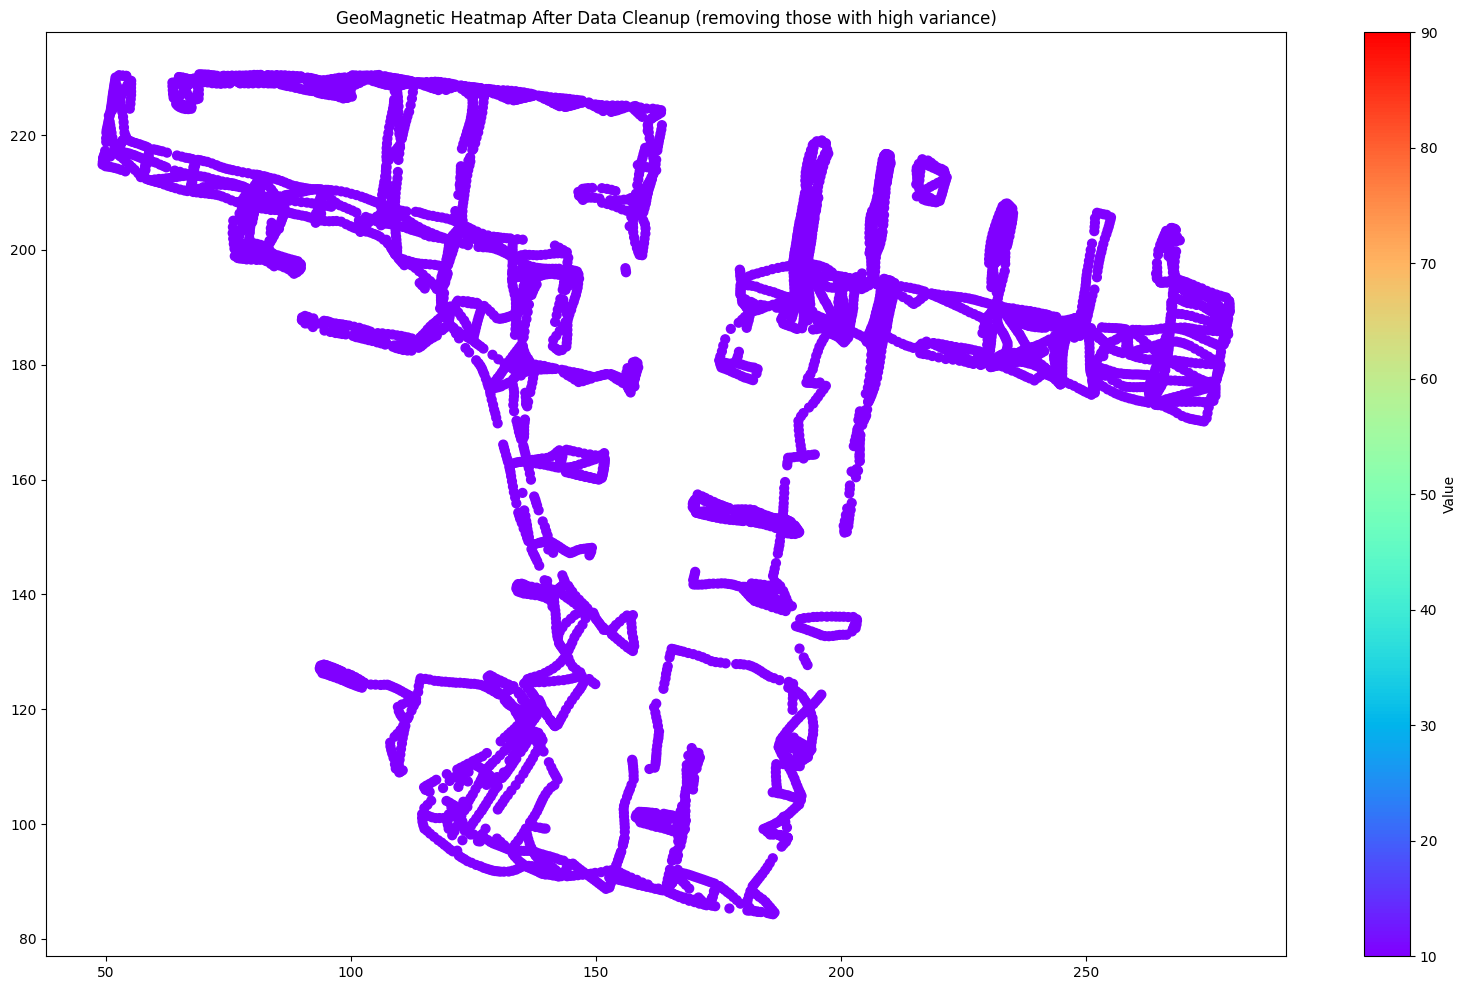

In [16]:
#visualize magnetic heatmap after data cleanup
#
# Define global color scale limits so all heat maps are consistent for comparison
global_vmin = 10  # replace with your desired minimum value
global_vmax = 90   # replace with your desired maximum value
#
new_magnetic_strength = revised_extract_magnetic_strength(mwi_datas)
position = np.array(list(new_magnetic_strength.keys()))
value = np.array(list(new_magnetic_strength.values()))
colorbar_title = "Value"
title = "GeoMagnetic Heatmap After Data Cleanup (removing those with high variance)"

# Create a scatter plot
plt.figure(figsize=(20, 12))
sc = plt.scatter(position[:, 0], position[:, 1], c=value, s=40, cmap='rainbow', vmin=global_vmin, vmax=global_vmax)  

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label(colorbar_title)

# Set the title
plt.title(title)

# Show the plot
plt.show()

In [17]:
def loadData(floor):
    #define variables and functions from main.py
    #below floor_data_dir is set to B1, F2, F4 respectively in 3 runs
    floor_data_dir = './data/site1/' + floor
    path_data_dir = floor_data_dir + '/path_data_files'
    floor_plan_filename = floor_data_dir + '/floor_image.png'
    floor_info_filename = floor_data_dir + '/floor_info.json'
    save_dir = './output/site1/' + floor
    path_image_save_dir = save_dir + '/path_images'
    step_position_image_save_dir = save_dir
    magn_image_save_dir = save_dir

    #create output directory and read data files and file names in specific floor
    Path(path_image_save_dir).mkdir(parents=True, exist_ok=True)
    Path(magn_image_save_dir).mkdir(parents=True, exist_ok=True)
    path_filenames = list(Path(path_data_dir).resolve().glob("*.txt"))

    mwi_datas = calibrate_magnetic_wifi_ibeacon_to_position(path_filenames)
    print("loaded data for " + floor)
    return path_filenames, mwi_datas

def plotRSSIForRouter(bssid, rssi_for_router, floor):
    n = len(rssi_for_router[bssid])
    dataToPlot = np.zeros((n, 3))

    #some position has matched with multiple measurements, average them together
    for i, (loc, value) in enumerate(rssi_for_router[bssid].items()):
        dataToPlot[i][0] = loc[0]
        dataToPlot[i][1] = loc[1]
        dataToPlot[i][2] = np.mean(value)

    colorbar_title = "Average RSSI"
    title = "Average RSSI measured at bssid:" + bssid + " at " + floor
    plt.figure(figsize=(10, 6))
    sc = plt.scatter(dataToPlot[:, 0], dataToPlot[:, 1], c=dataToPlot[:, 2], s=40, cmap='rainbow')

    cbar = plt.colorbar(sc)
    cbar.set_label(colorbar_title)
    plt.title(title)
    plt.show()
    
def tidyDataForRouter(mwi_datas):
    rssi_for_router = {}
    for loc, mwi_data in mwi_datas.items():
        wifi_datas = mwi_data['wifi']
        for wifi_data in wifi_datas:
            bssid = wifi_data[2]
            rssi = int(wifi_data[3])
            if not (bssid in rssi_for_router.keys()):
                rssi_for_router[bssid] = {}
            if not (loc in rssi_for_router[bssid].keys()):
                rssi_for_router[bssid][loc] = []

            rssi_for_router[bssid][loc].append(rssi)
    return rssi_for_router

In [18]:
collectedData = {}
rssi_for_router  = tidyDataForRouter(mwi_datas)

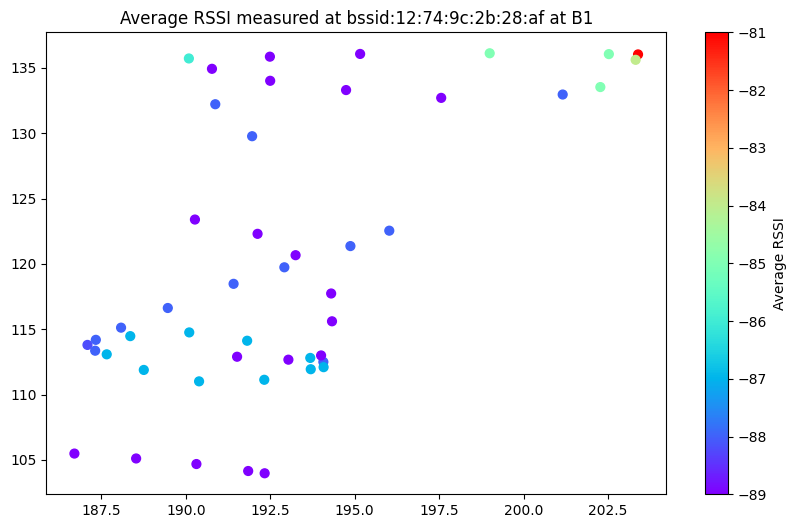

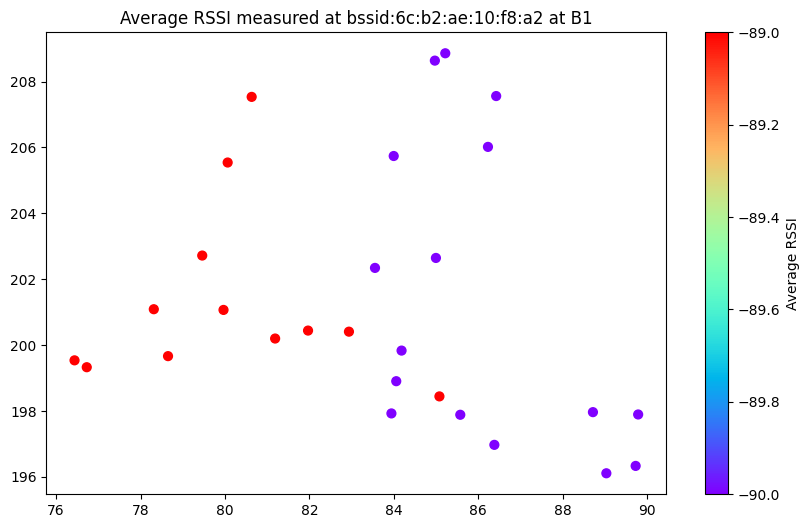

In [19]:
#two random router is selected for display
sampledRouters = random.sample(list(rssi_for_router.keys()), 2)
for bssid in sampledRouters:
    plotRSSIForRouter(bssid, rssi_for_router, selected_floor)